# AegisLens: Explainable Phishing Detector
model_training_dataset2.ipynb - Analysis for Dataset 2
---

## 1. Project Setup and Library Imports

In [6]:
import pandas as pd
import os
import kaggle
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

Libraries imported successfully.


## 2. Data Acquisition for Dataset #2
This notebook focuses on the "Phishing Domain Detection || CyberSecurity" dataset from Kaggle.
Source: [michellevp/dataset-phishing-domain-detection-cybersecurity](https://www.kaggle.com/datasets/michellevp/dataset-phishing-domain-detection-cybersecurity/data)

In [7]:
# Define the dataset path and the local directory to store it
dataset_path = 'michellevp/dataset-phishing-domain-detection-cybersecurity'
data_dir = 'data'
# The file inside this dataset is named 'dataset_phishing.csv'
file_name_ds2 = 'dataset_cybersecurity_michelle.csv'
file_path_ds2 = os.path.join(data_dir, file_name_ds2)

# Create the data directory if it doesn't exist
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print(f"Directory '{data_dir}' created.")

# Download the dataset if it doesn't already exist
if not os.path.exists(file_path_ds2):
    print("Dataset #2 not found locally. Downloading from Kaggle...")
    try:
        kaggle.api.dataset_download_files(dataset_path, path=data_dir, unzip=True)
        print("Dataset #2 downloaded and unzipped successfully.")
    except Exception as e:
        print(f"An error occurred during download: {e}")
else:
    print("Dataset #2 already exists locally.")

Dataset #2 already exists locally.


## 3. Load Dataset and Initial Exploration
Load the data and perform a quick health check.

In [8]:
try:
    df2 = pd.read_csv(file_path_ds2)
    print("\nDataset #2 loaded successfully. Here's a preview:")
    display(df2.head())
except FileNotFoundError:
    print(f"Error: The file {file_path_ds2} was not found. Please check the download step.")


Dataset #2 loaded successfully. Here's a preview:


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,1,0,0,1,0,0,0,0,0,0,...,2,2,5,292,0,-1,0,0,0,1
1,2,5,4,2,0,0,0,0,0,0,...,2,4,2,52,0,1,0,0,0,1
2,2,0,0,0,0,0,0,0,0,0,...,2,2,0,298,1,1,0,0,0,0
3,1,1,0,2,0,0,0,0,0,0,...,1,2,5,1792,0,0,0,0,0,1
4,2,1,0,0,0,0,0,0,0,0,...,1,2,1,299,1,1,0,0,0,0


## 4. Initial Exploratory Data Analysis (EDA)


--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129698 entries, 0 to 129697
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 110.8 MB

Total number of missing values in the dataset: 0
Dataset #2 is clean with no missing values.

--- Target Variable Distribution ---
phishing
0    77546
1    52152
Name: count, dtype: int64


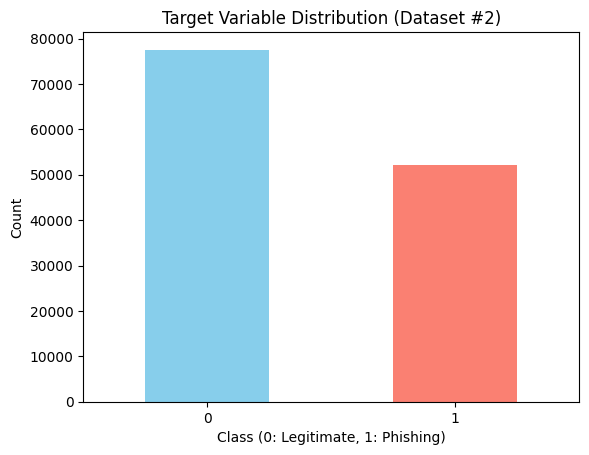

In [10]:
# Get a concise summary of the DataFrame.
# With 114 features, this will be a long list.
print("\n--- DataFrame Info ---")
df2.info()

# Check for any missing values.
missing_values_ds2 = df2.isnull().sum().sum()
print(f"\nTotal number of missing values in the dataset: {missing_values_ds2}")
if missing_values_ds2 == 0:
    print("Dataset #2 is clean with no missing values.")
else:
    print("Warning: Dataset contains missing values that need to be handled.")

# Check the balance of our target variable ('phishing').
# 1 indicates a phishing URL, 0 indicates a legitimate URL.
print("\n--- Target Variable Distribution ---")
if 'phishing' in df2.columns:
    print(df2['phishing'].value_counts())
    # Visualize the distribution
    df2['phishing'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], rot=0)
    plt.title('Target Variable Distribution (Dataset #2)')
    plt.xlabel('Class (0: Legitimate, 1: Phishing)')
    plt.ylabel('Count')
    plt.show()
else:
    print("Warning: Target column 'phishing' not found.")

# Part 2: Model Benchmarking
---

## 5. Data Preparation and Model Training Setup
We'll now prepare the data and train our suite of models.

In [11]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Define features (X) and target (y) for Dataset #2
# X will contain all columns except the target, 'phishing'.
X_ds2 = df2.drop('phishing', axis=1)

# y is our target variable.
y_ds2 = df2['phishing']

print(f"Shape of features (X_ds2): {X_ds2.shape}")
print(f"Shape of target (y_ds2): {y_ds2.shape}")

Shape of features (X_ds2): (129698, 111)
Shape of target (y_ds2): (129698,)


## 6. Splitting the Data
We use stratify=y_ds2 to ensure the 60/40 class imbalance is preserved in both our training and testing sets.

In [12]:
X_train_ds2, X_test_ds2, y_train_ds2, y_test_ds2 = train_test_split(
    X_ds2, y_ds2,
    test_size=0.2,
    stratify=y_ds2,
    random_state=42
)

print("\nDataset #2 split into training and testing sets.")


Dataset #2 split into training and testing sets.


## 7. Model Training and Evaluation
Train and evaluate all four models on this dataset.

### Logistic Regression

In [13]:
# Dictionary to store the performance of models on this dataset
model_performance_ds2 = {}

# --- Model 1: Logistic Regression ---
print("\n--- Training Logistic Regression on Dataset #2 ---")
start_time = time.time()
log_reg_ds2 = LogisticRegression(max_iter=1000, random_state=42).fit(X_train_ds2, y_train_ds2)
y_pred_lr_ds2 = log_reg_ds2.predict(X_test_ds2)
lr_time_ds2 = time.time() - start_time
model_performance_ds2['Logistic Regression'] = [
    accuracy_score(y_test_ds2, y_pred_lr_ds2),
    precision_score(y_test_ds2, y_pred_lr_ds2),
    recall_score(y_test_ds2, y_pred_lr_ds2),
    f1_score(y_test_ds2, y_pred_lr_ds2),
    lr_time_ds2
]
print(f"Logistic Regression training complete in {lr_time_ds2:.2f}s")


--- Training Logistic Regression on Dataset #2 ---
Logistic Regression training complete in 47.52s


/home/ddf/Documents/projects/aegis_lens/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree Classifier

In [14]:
# --- Model 2: Decision Tree ---
print("\n--- Training Decision Tree on Dataset #2 ---")
start_time = time.time()
dec_tree_ds2 = DecisionTreeClassifier(random_state=42).fit(X_train_ds2, y_train_ds2)
y_pred_dt_ds2 = dec_tree_ds2.predict(X_test_ds2)
dt_time_ds2 = time.time() - start_time
model_performance_ds2['Decision Tree'] = [
    accuracy_score(y_test_ds2, y_pred_dt_ds2),
    precision_score(y_test_ds2, y_pred_dt_ds2),
    recall_score(y_test_ds2, y_pred_dt_ds2),
    f1_score(y_test_ds2, y_pred_dt_ds2),
    dt_time_ds2
]
print(f"Decision Tree training complete in {dt_time_ds2:.2f}s")


--- Training Decision Tree on Dataset #2 ---
Decision Tree training complete in 1.62s


### Random Forest

In [15]:
# --- Model 3: Random Forest ---
print("\n--- Training Random Forest on Dataset #2 ---")
start_time = time.time()
rf_clf_ds2 = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1).fit(X_train_ds2, y_train_ds2)
y_pred_rf_ds2 = rf_clf_ds2.predict(X_test_ds2)
rf_time_ds2 = time.time() - start_time
model_performance_ds2['Random Forest'] = [
    accuracy_score(y_test_ds2, y_pred_rf_ds2),
    precision_score(y_test_ds2, y_pred_rf_ds2),
    recall_score(y_test_ds2, y_pred_rf_ds2),
    f1_score(y_test_ds2, y_pred_rf_ds2),
    rf_time_ds2
]
print(f"Random Forest training complete in {rf_time_ds2:.2f}s")


--- Training Random Forest on Dataset #2 ---
Random Forest training complete in 3.21s


### Gradient Boosting Classifier

In [16]:
# --- Model 4: Gradient Boosting ---
print("\n--- Training Gradient Boosting on Dataset #2 ---")
start_time = time.time()
gb_clf_ds2 = GradientBoostingClassifier(n_estimators=100, random_state=42).fit(X_train_ds2, y_train_ds2)
y_pred_gb_ds2 = gb_clf_ds2.predict(X_test_ds2)
gb_time_ds2 = time.time() - start_time
model_performance_ds2['Gradient Boosting'] = [
    accuracy_score(y_test_ds2, y_pred_gb_ds2),
    precision_score(y_test_ds2, y_pred_gb_ds2),
    recall_score(y_test_ds2, y_pred_gb_ds2),
    f1_score(y_test_ds2, y_pred_gb_ds2),
    gb_time_ds2
]
print(f"Gradient Boosting training complete in {gb_time_ds2:.2f}s")


--- Training Gradient Boosting on Dataset #2 ---
Gradient Boosting training complete in 31.83s


## 8. Final Model Comparison for Dataset #2


--- Final Model Performance Comparison (Dataset #2) ---


,Accuracy,Precision,Recall,F1-Score,Training Time (s)
Logistic Regression,0.903123,0.857440,0.910459,0.883154,47.521089
Decision Tree,0.981766,0.975368,0.979388,0.977374,1.616760
Random Forest,0.989167,0.986111,0.986962,0.986536,3.205765
Gradient Boosting,0.946029,0.930089,0.936152,0.933110,31.832130


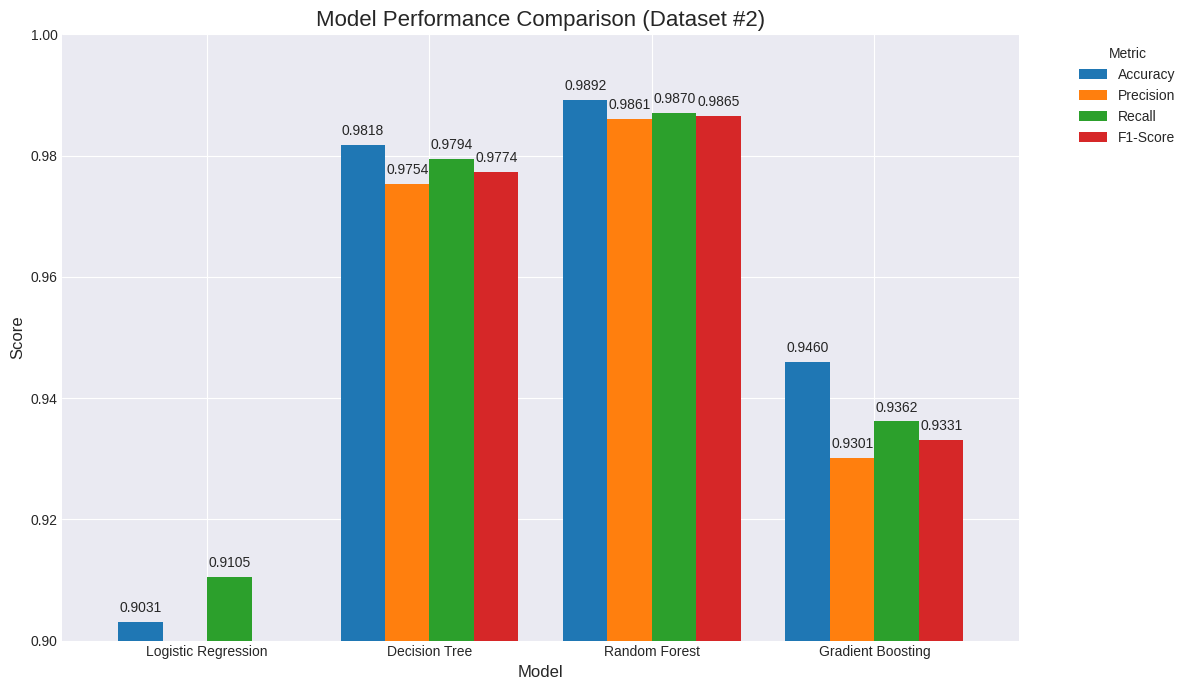

In [17]:
print("\n--- Final Model Performance Comparison (Dataset #2) ---")
performance_df_ds2 = pd.DataFrame.from_dict(
    model_performance_ds2,
    orient='index',
    columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time (s)']
)
display(performance_df_ds2)

# --- Visualize Model Performance ---
metrics_to_plot_ds2 = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
performance_to_plot_ds2 = performance_df_ds2[metrics_to_plot_ds2]

plt.style.use('seaborn-v0_8-darkgrid')
ax = performance_to_plot_ds2.plot(kind='bar', figsize=(12, 7), rot=0, width=0.8)
plt.title('Model Performance Comparison (Dataset #2)', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0.9, 1.0)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

# Final Selection
---

## 9. Select and Serialize the Champion Model for Dataset #2
Based on the empirical evidence from our benchmark table and visualization, the Random Forest classifier is the clear winner for this dataset. It provided the highest performance across all key metrics.

In [18]:
import joblib

# Select the champion model from this run
champion_model_ds2 = rf_clf_ds2
print(f"\nChampion model for Dataset #2 selected: {type(champion_model_ds2).__name__}")

# Create the models directory if it doesn't already exist
if not os.path.exists('models'):
    os.makedirs('models')
    print("Created 'models' directory.")

# Save the serialized model with a distinct name
model_filename_ds2 = 'models/url_model_ds2.joblib'
joblib.dump(champion_model_ds2, model_filename_ds2)

print(f"\nChampion model for Dataset #2 has been serialized to '{model_filename_ds2}'")


Champion model for Dataset #2 selected: RandomForestClassifier

Champion model for Dataset #2 has been serialized to 'models/url_model_ds2.joblib'
